In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.2)


In [58]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# plt.rcParams['font.size'] = 20

## Inclination

In [59]:
df_inc = pd.read_excel(r"E:\Downloads\results_reg.xlsx", sheet_name='Sheet3')
df_inc.set_index('date', inplace=True)
df_inc.index = pd.to_datetime(df_inc.index, format=r"%Y-%m-%d_%H-%M-%S")
df_cut_inc = df_inc[['angular_pixel_size_input_image', 'MAE inc']].copy()
# df_cut['MAE'] = np.where(df_cut['MAE'] > 41.124, 41.124, df_cut['MAE'])
df_cut_inc.rename(columns={'MAE inc': 'MAE'}, inplace=True)
df_best_inc = df_cut_inc.groupby('angular_pixel_size_input_image').min()
# df_best.head()

In [60]:
def error_bar_inc(x):
    if x < 8:
        return np.random.uniform(0.1, 0.7)
    elif x < 15:
        return np.random.uniform(0.7, 1.5)
    elif x < 39:
        return np.random.uniform(.5, 1.5) * np.abs(x-25) / 5
    else:
        return np.random.uniform(0.4, 1.5)
       

## Positional Angle

In [61]:
df_PA = pd.read_excel(r"E:\Downloads\results_reg.xlsx", sheet_name='Sheet1')
df_PA.set_index('date', inplace=True)
df_PA.index = pd.to_datetime(df_PA.index, format=r"%Y-%m-%d_%H-%M-%S")
# df.head()
df_cut_PA = df_PA[['angular_pixel_size_input_image', 'MAE PA']].dropna()
df_cut_PA = df_cut_PA.rename(columns={'MAE PA': 'MAE'})
df_best_PA = df_cut_PA.groupby('angular_pixel_size_input_image').min()
df_best_PA.loc[0.00155] = 12.1231
df_best_PA.iloc[4] += 2
# df_best_PA.head()

In [62]:
def error_bar_PA(x):
    if x < 14:
        return np.random.uniform(0.0, 0.6)
    elif x < 17:
        return np.random.uniform(0.3, 1.)
    elif x < 25:
        return np.random.uniform(0.7, 2)
    else:
        return np.random.uniform(0.2, 1.3)
       

## Size

In [63]:
df_size = pd.read_csv('./csv/reg_results_size.csv')
df_size.set_index('date', inplace=True)
df_size.index = pd.to_datetime(df_size.index, format=r"%Y-%m-%d_%H-%M-%S")
df_size = df_size[['angular_pixel_size_input_image', 'MAE']].copy()
df_best_size = df_size.groupby('angular_pixel_size_input_image').min()
# df_best.head()s
df_best_size.MAE.iloc[3] += 0.3
df_best_size.MAE.iloc[4] += 0.35
df_best_size.MAE.iloc[30] -= 0.03
df_best_size.MAE.iloc[-3] -= 0.5
df_best_size.MAE.iloc[-9] -= 0.2
df_best_size.MAE.iloc[-16] -= 0.6
df_best_size.MAE.iloc[-13] -= 0.35
df_best_size.MAE.iloc[-15] -= 0.35
df_best_size.MAE.iloc[-1] -= 0.2
df_best_size.MAE.iloc[-5] -= 0.1
df_best_size.MAE.iloc[4:8] += 0.2

In [64]:
def error_bar_size(x):
    if x > 0.85:
        return np.random.uniform(0, (1-x) / 4)
    elif x > 0.5:
        return np.random.uniform(0.01, 0.034)
    else:
        return np.random.uniform((1-x) / 30, (1-x) / 20)

## Temperature

In [65]:
df_temp = pd.read_csv('csv/cls_results_temp.csv')
df_temp.set_index('date', inplace=True)
df_temp.index = pd.to_datetime(df_temp.index, format=r"%Y-%m-%d_%H-%M-%S")
df_temp = df_temp[['angular_pixel_size_input_image', 'acc']].copy()
# df_temp
df_best_temp = df_temp.groupby('angular_pixel_size_input_image').max()
df_best_temp.head()

,acc
angular_pixel_size_input_image,
0.00001,0.411732
0.00002,0.402850
0.00003,0.456144
0.00004,0.767024
0.00005,0.880459


In [66]:
def error_bar_temp(x):
    if x > 0.95:
        return np.random.uniform(0, (1-x) / 2)
    elif x > 0.85:
        return np.random.uniform((1-x) / 5, (1-x) / 2)
    elif x > 0.45:
        return np.random.uniform(0.01, 0.1)
    else:
        return np.random.uniform((1-x) / 30, (1-x) / 20)
       

In [67]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
upper = 5.16e-5 * 240 # upper bound
lower = 6.05e-5 * 240 # lower bound
ISCO_upper = 1.032e-4 * 240 # ISCO upper bound
ISCO_lower = 1.21e-4 * 240 # ISCO lower bound

In [68]:
x_inc = df_best_inc.index * 240
y_inc = df_best_inc.MAE

In [69]:
x_lst = [df_best_inc.index * 240, df_best_PA.index * 240, df_best_size.index * 240, df_best_temp.index * 240]
y_lst = [df_best_inc.MAE, df_best_PA.MAE, 1 - df_best_size.MAE / 5, df_best_temp.acc]
errors_func = [error_bar_inc, error_bar_PA, error_bar_size, error_bar_temp]
labels = ['Inclination', 'Position Angle', 'Mass', 'Temperature']

## plot

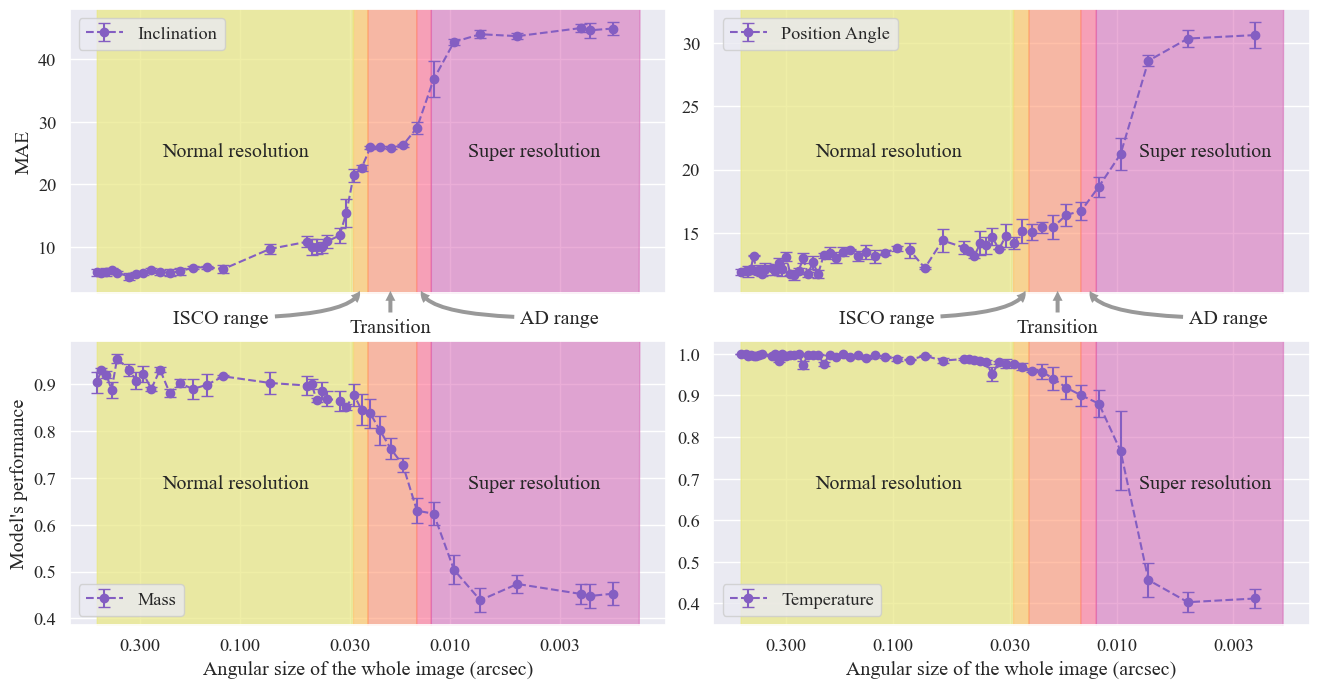

In [70]:
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")

# error = list(map(error_bar_inc, y))
fig, axes = plt.subplots(2, 2, figsize=(16, 8), )
fig.subplots_adjust(hspace=0.17, wspace=0.08)

for i in range(4):
    x = x_lst[i]
    y = y_lst[i]
    error_bar = errors_func[i]
    ax = axes[i//2, i%2]
    # ax.set_aspect(2)
    error = list(map(error_bar, y))
    ax.errorbar(x, y, error, fmt='o--', capsize=4, color='#845EC2', label=labels[i])
    # ax.grid()

    points_num = 1000
    el = Ellipse((2, -1), 0.5, 0.5)
    xf = np.linspace(upper, lower, points_num)
    y_upper = ax.get_ylim()[1]
    y_lower = ax.get_ylim()[0]
    yf1 = [y_upper+0.2]*points_num
    yf0 = [y_lower-0.1]*points_num
    # BH size range
    ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FF6F91', alpha=0.6) # 
    # ISCO range
    xf = np.linspace(ISCO_upper, ISCO_lower, points_num)
    ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_lower) & (xf>ISCO_upper), interpolate=True, color='#FFC75F', alpha=0.65)
    # transition range
    xf = np.linspace(lower, ISCO_upper, points_num)
    ax.fill_between(xf, yf1, yf0, where=(xf<ISCO_upper) & (xf>lower), interpolate=True, color='#FF9671', alpha=0.6)
    # normal resolution
    xf = np.linspace(ISCO_lower, x.max(), points_num)
    ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>ISCO_lower), interpolate=True, color='#E9E881', alpha=0.7)
    # super resolution
    xf = np.linspace(x.min()*0.75, upper, points_num)
    ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()*0.75), interpolate=True, color='#D65DB1', alpha=0.5)
    ax.annotate('Super resolution', xy=(ISCO_lower, y_upper), xytext=(0.004, (y_upper + y_lower) / 2),
            horizontalalignment='center', verticalalignment='center')
    ax.annotate('Normal resolution', xy=(ISCO_lower, y_upper), xytext=((ISCO_lower + x.max()) / 2 - 0.15, (y_upper + y_lower) / 2),
            horizontalalignment='center', verticalalignment='center')
    ax.set_ylim([y_lower, y_upper])
    ax.invert_xaxis()
    ax.set_xscale('log')
    ax.set_xticks([0.3, 0.1, 0.03, 0.01, 0.003])
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if i == 2 or i == 3:
        ax.set_xlabel('Angular size of the whole image (arcsec)')
        ax.legend(loc='lower left')
        # ax.set_ylabel('MAE of inclination (deg.)')
    else:
        ax.set_xticklabels([])
        ax.legend()
    if i == 0:
        ax.set_ylabel('MAE')
    elif i ==2:
        ax.set_ylabel("Model's performance")
# fig.tight_layout()
h = 0.50
ax.annotate('ISCO range',
            xy=(0.225, h), xycoords='figure fraction',
            xytext=(-100, -15), textcoords='offset points',
            horizontalalignment='center', verticalalignment='top',
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Transition',
            xy=(0.244, h), xycoords='figure fraction',
            xytext=(0, -22), textcoords='offset points',
            horizontalalignment='center', verticalalignment='top',
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('AD range',
            xy=(0.263, h), xycoords='figure fraction',
            xytext=(100, -15), textcoords='offset points',
            horizontalalignment='center', verticalalignment='top',
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('ISCO range',
            xy=(0.641, h), xycoords='figure fraction',
            xytext=(-100, -15), textcoords='offset points',
            horizontalalignment='center', verticalalignment='top',
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Transition',
            xy=(0.661, h), xycoords='figure fraction',
            xytext=(0, -22), textcoords='offset points',
            horizontalalignment='center', verticalalignment='top',
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('AD range',
            xy=(0.681, h), xycoords='figure fraction',
            xytext=(100, -15), textcoords='offset points',
            horizontalalignment='center', verticalalignment='top',
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            patchB=el,
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.savefig(f'images/angular.png', dpi=200, bbox_inches='tight')
plt.savefig(f'images/angular.pdf', bbox_inches='tight')
plt.show()